In [288]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [289]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

<h3> Loading data </h3>

In [290]:
csv_files = ["KCPD_Crime_Data_Cleaned.csv"]
list_df = []

for file in csv_files:
    list_df.append(pd.read_csv("Data/"+file))
    
crimes = pd.concat(list_df)

In [291]:
crimes.head(100)

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,Beat,Address,City,Zip Code,Rep_Dist,Area,DVFlag,Involvement,Race,Sex,Age,Location,Offense_Cleaned,Firearm_Flag,Age_Categorical,Reported_Date_Time,From_Date_Time,Reported_Date_Time:year,Reported_Date_Time:month,Reported_Date_Time:day,Reported_Date_Time:day_of_week,Reported_Date_Time:hour
0,KC19024462,04/04/2019,14:09,04/04/2019,14:07,04/04/2019,14:09,Stealing – Shoplift,23C,Shoplifting,241,3700 E GREGORY BLVD,KANSAS CITY,64132.0,PJ5365,MPD,N,ARR CHA SUS,Black,M,45.0,NaN,Theft,0.0,26-50 years,2019-04-04 14:09:00,2019-04-04 14:07:00,2019,April,4,Thursday,14
1,KC19024953,04/06/2019,9:19,04/06/2019,6:35,04/06/2019,6:35,Property Damage,23H,All Other Larceny,636,11200 210 HWY,KANSAS CITY,64161.0,NaN,SCP,N,VIC,Unknown,M,38.0,NaN,Vandalism,0.0,26-50 years,2019-04-06 09:19:00,2019-04-06 06:35:00,2019,April,6,Saturday,9
2,KC19024923,04/06/2019,3:27,04/06/2019,3:27,04/06/2019,4:00,Eluding / Resisting a Lawful Stop,NaN,NaN,315,NORLEDGE AVE and N OAKLEY AVE,KANSAS CITY,64123.0,PJ0243,EPD,N,SUS,White,F,28.0,NaN,Other Offenses,0.0,26-50 years,2019-04-06 03:27:00,2019-04-06 03:27:00,2019,April,6,Saturday,3
3,KC19031307,04/29/2019,19:42,04/29/2019,19:30,04/29/2019,20:10,Stealing – Shoplift,23C,Shoplifting,345,11600 E US 40 HWY,KANSAS CITY,64133.0,PJ3601,EPD,N,VIC,Unknown,U,36.0,NaN,Theft,0.0,26-50 years,2019-04-29 19:42:00,2019-04-29 19:30:00,2019,April,29,Monday,19
4,KC19029070,04/21/2019,12:00,04/21/2019,12:00,04/21/2019,12:00,Stealing – Shoplift,23C,Shoplifting,345,11600 E US 40 HWY,KANSAS CITY,64133.0,PJ3601,EPD,N,VIC,Unknown,U,36.0,NaN,Theft,0.0,26-50 years,2019-04-21 12:00:00,2019-04-21 12:00:00,2019,April,21,Sunday,12
5,KC19025440,04/08/2019,13:42,04/02/2019,12:05,04/02/2019,12:05,Recovered Property,NaN,NaN,113,900 E 21ST ST,KANSAS CITY,64108.0,PJ1725,CPD,N,VIC,White,M,38.0,NaN,Vandalism,0.0,26-50 years,2019-04-08 13:42:00,2019-04-02 12:05:00,2019,April,8,Monday,13
6,KC19024783,04/05/2019,16:17,04/05/2019,16:10,04/05/2019,16:10,Trespass of Real Property,90G,Liquor Law Violations,345,11600 E US 40 HWY,KANSAS CITY,64133.0,PJ3601,EPD,N,ARR CHA SUS,Black,M,59.0,NaN,Vandalism,0.0,51-75 years,2019-04-05 16:17:00,2019-04-05 16:10:00,2019,April,5,Friday,16
7,KC19025358,04/08/2019,7:29,04/05/2019,18:00,04/08/2019,7:29,Stolen Auto,240,Motor Vehicle Theft,414,8300 N GREEN HILLS RD,KANSAS CITY,64151.0,PP0367,NPD,N,VIC,Unknown,U,36.0,NaN,Theft,0.0,26-50 years,2019-04-08 07:29:00,2019-04-05 18:00:00,2019,April,8,Monday,7
8,KC19033370,05/07/2019,6:54,05/07/2019,7:50,05/07/2019,9:00,Endangering the Welfare of a Child,90F,"Family Offenses, Nonviolent",213,6300 MANCHESTER AVE,KANSAS CITY,64129.0,NaN,MPD,Y,ARR CHA,Black,F,30.0,NaN,Other Offenses,1.0,26-50 years,2019-05-07 06:54:00,2019-05-07 07:50:00,2019,May,7,Tuesday,6
9,KC19032362,05/03/2019,11:47,04/24/2019,12:00,04/25/2019,12:00,Identity Theft,26F,Identity Theft,132,00 W 36TH ST,KANSAS CITY,64111.0,NaN,CPD,N,VIC,White,M,59.0,NaN,Theft,0.0,51-75 years,2019-05-03 11:47:00,2019-04-24 12:00:00,2019,May,3,Friday,11


In [292]:
crimes['Reported_Date_Time'] =  pd.to_datetime(crimes['Reported_Date_Time'])

print(crimes.shape)
print(crimes.info())

(25845, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25845 entries, 0 to 25844
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Report_No                       25845 non-null  object        
 1   Reported_Date                   25845 non-null  object        
 2   Reported_Time                   25845 non-null  object        
 3   From_Date                       25845 non-null  object        
 4   From_Time                       25842 non-null  object        
 5   To_Date                         25845 non-null  object        
 6   To_Time                         25748 non-null  object        
 7   Offense                         25845 non-null  object        
 8   IBRS                            24004 non-null  object        
 9   Description                     18964 non-null  object        
 10  Beat                            25845 non-null  object    

In [411]:
(14275 + 11570) / 2

12922.5

Text(0.5, 1.0, 'Crimes distribution by Month')

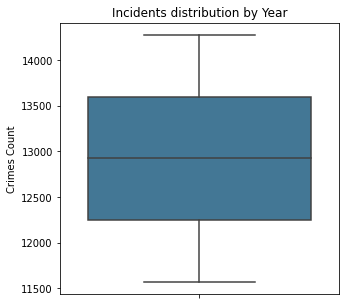

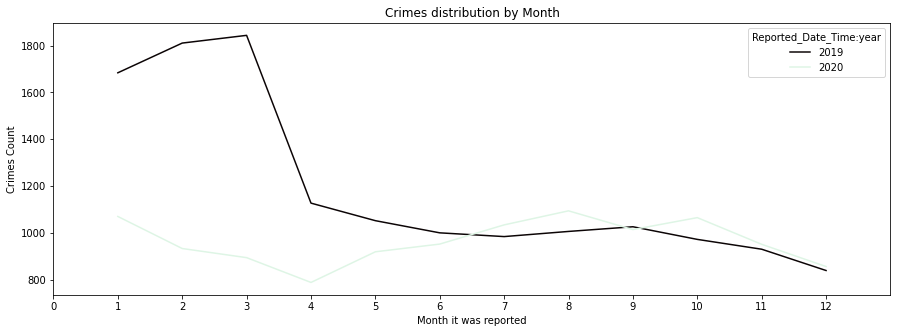

In [317]:
year_counts = crimes[['Reported_Date_Time:year']]\
                .groupby(['Reported_Date_Time:year'],)['Reported_Date_Time:year']\
                .count().reset_index(name='count')

# month_counts = crimes[['Reported_Date_Time:month']]\
#                 .groupby(['Reported_Date_Time:month'],)['Reported_Date_Time:month']\
#                 .count().reset_index(name='count')

# crimes['Reported_Date_Time:month'] = crimes['Reported_Date_Time'].dt.month.astype(str) + '-'+\
#                                     crimes['Reported_Date_Time:month'].astype(str)

# print(crimes.head())

crimes['Reported_Date_Time:month'] = crimes['Reported_Date_Time'].dt.month

month_counts = crimes[['Reported_Date_Time:month','Reported_Date_Time:year']]\
                .groupby(['Reported_Date_Time:month','Reported_Date_Time:year'],)['Reported_Date_Time:month']\
                .count().reset_index(name='count')


plt.figure(figsize=(5,5))
graph = sns.boxplot(y='count',data=year_counts, palette='mako')
plt.title("Incidents distribution by Year")
graph.set_ylabel('Crimes Count')


plt.figure(figsize=(15,5))
graph = sns.lineplot(x='Reported_Date_Time:month',y='count', hue='Reported_Date_Time:year', data=month_counts,  palette='mako')
graph.set_xlim(0,13)
graph.set_xticks(range(0,13))
graph.set_ylabel('Crimes Count')
graph.set_xlabel('Month it was reported')
plt.title("Crimes distribution by Month")

Text(0.5, 1.0, 'Crimes distribution by Month')

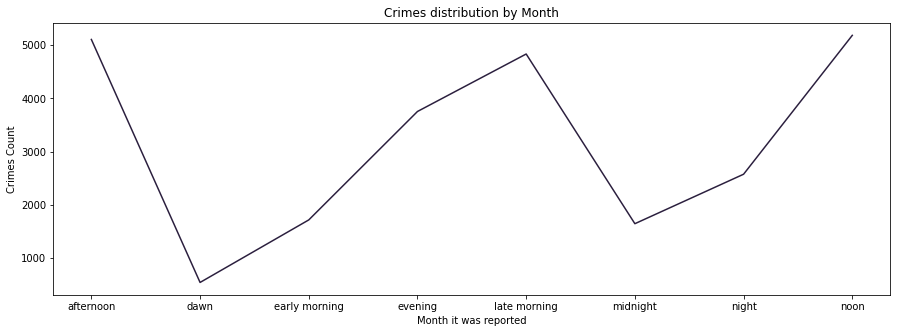

In [332]:
hour_counts = crimes[['Reported_Date_Time:hour_part']]\
                .groupby(['Reported_Date_Time:hour_part'],)['Reported_Date_Time:hour_part']\
                .count().reset_index(name='count')

plt.figure(figsize=(15,5))
graph = sns.lineplot(x='Reported_Date_Time:hour_part',y='count', data=hour_counts,  palette='mako')
# graph.set_xlim(-1,25)
# graph.set_xticks(range(0,24))
graph.set_ylabel('Crimes Count')
graph.set_xlabel('Month it was reported')
plt.title("Crimes distribution by Month")

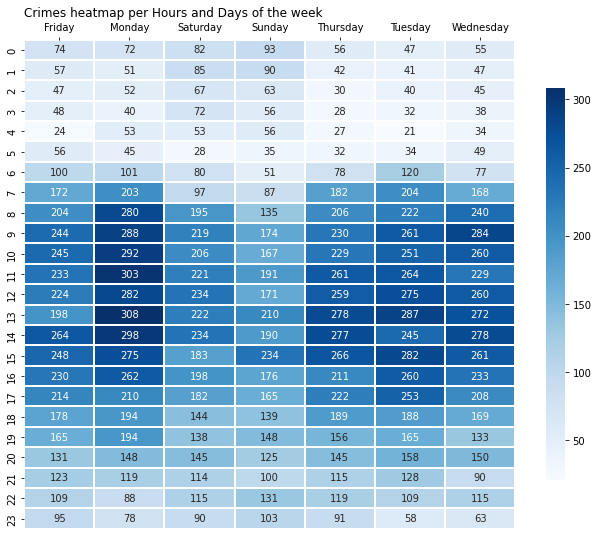

In [407]:
# heatmap to graph hours and day of week
hour_days_counts = crimes[['Reported_Date_Time:day_of_week','Reported_Date_Time:hour']]\
                .groupby(['Reported_Date_Time:day_of_week','Reported_Date_Time:hour'],)\
            ['Reported_Date_Time:hour']\
                .count()

hour_days_counts = hour_days_counts.unstack(level=0)
# hour_days_counts

plt.figure(figsize=(11,9))
graph = sns.heatmap(hour_days_counts,cmap="Blues", linewidth=0.3, cbar_kws={"shrink": .8},annot=True, fmt='g')
graph.xaxis.tick_top()
plt.title('Crimes heatmap per Hours and Days of the week', loc='left')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
year_counts

In [ ]:
offense_counts = crimes[['Offense_Cleaned']]\
                .groupby(['Offense_Cleaned'],)['Offense_Cleaned']\
                .count().reset_index(name='count').sort_values(['count'], ascending=False)
offense_counts

Text(0.5, 1.0, 'Crimes by Type')

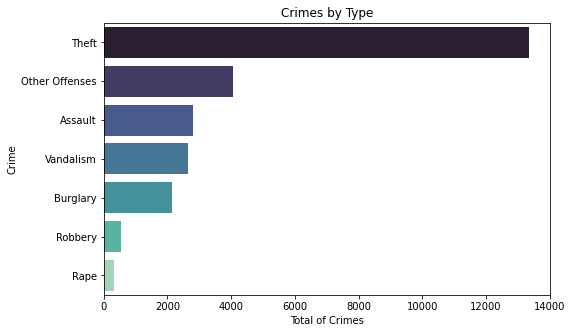

In [302]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x='count', y = 'Offense_Cleaned', data=offense_counts, palette='mako')
ax.set_xlabel('Total of Crimes')
ax.set_ylabel('Crime')
plt.title("Crimes by Type")

Text(0.5, 1.0, 'Crimes by Type')

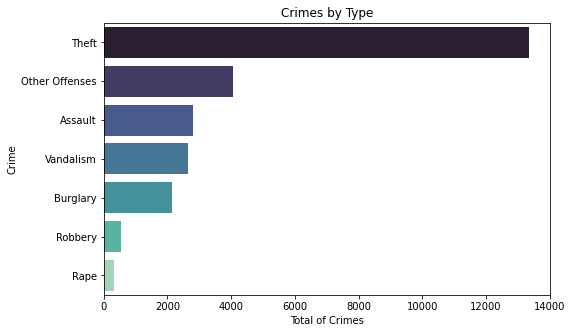

In [408]:
offense_counts = crimes[['Offense_Cleaned']]\
                .groupby(['Offense_Cleaned'],)['Offense_Cleaned']\
                .count().reset_index(name='count').sort_values(['count'], ascending=False)
offense_counts

plt.figure(figsize=(8,5))
graph = sns.barplot(x='count', y = 'Offense_Cleaned', data=offense_counts, palette='mako')
graph.set_xlabel('Total of Crimes')
graph.set_ylabel('Crime')
plt.title("Crimes by Type")

In [409]:
crimes.dtypes

Report_No                                 object
Reported_Date                             object
Reported_Time                             object
From_Date                                 object
From_Time                                 object
To_Date                                   object
To_Time                                   object
Offense                                   object
IBRS                                      object
Description                               object
Beat                                      object
Address                                   object
City                                      object
Zip Code                                 float64
Rep_Dist                                  object
Area                                      object
DVFlag                                    object
Involvement                               object
Race                                      object
Sex                                       object
Age                 

Text(0.5, 1.0, 'Distribution of firearms used')

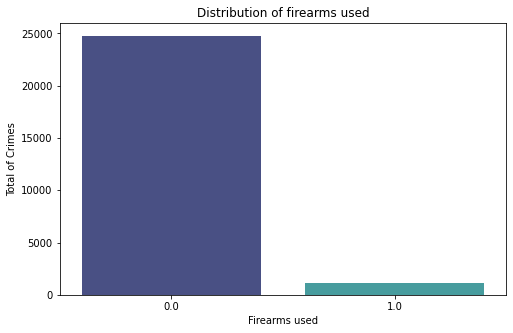

In [424]:
firearm_count = crimes[['Firearm_Flag']]\
                .groupby(['Firearm_Flag'],)['Firearm_Flag']\
                .count().reset_index(name='count').sort_values(['count'], ascending=False)
firearm_count

plt.figure(figsize=(8,5))
graph = sns.barplot(x='Firearm_Flag', y = 'count', data=firearm_count, palette='mako')
graph.set_xlabel('Firearms used')
graph.set_ylabel('Total of Crimes')
plt.title("Distribution of firearms used")

Text(0.5, 1.0, 'Crimes by Type')

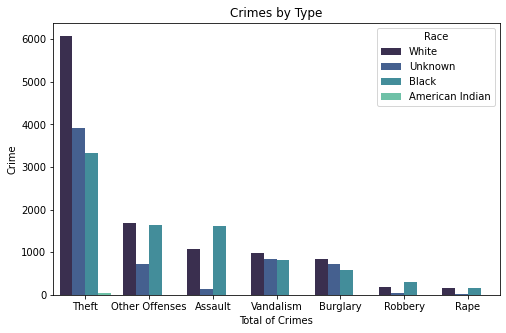

In [423]:
race_count = crimes[['Offense_Cleaned','Race']]\
                .groupby(['Offense_Cleaned','Race'],)['Race']\
                .count().reset_index(name='count').sort_values(['count'], ascending=False)
race_count

plt.figure(figsize=(8,5))
graph = sns.barplot(x='Offense_Cleaned', y = 'count', hue='Race', data=race_count, palette='mako')
graph.set_xlabel('Total of Crimes')
graph.set_ylabel('Crime')
plt.title("Crimes by Type")